# Chapter 3
## Data Manipulation

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

# The line below one is only needed for this workshop
from done import imdone, quizanswer

In [5]:
# Make figures bigger in presentation
from matplotlib import rcParams
rcParams['figure.dpi'] = 144

We already saw a small example at the end of chapter 1 when we talked about data sanitazion. We filtered the data in such a way that we only saw the names that were only one letter long.

Here we will again focus on the baby names data set. So load the CSV again as we did before.
### Exercise 3.1
Load `data/ontariobabynames.csv` and store the result in the object `babynames`.

In [4]:
# Solution (HIDEME)
babynames = pd.read_csv('data/ontariobabynames.csv')

In [ ]:
imdone(3,1)

If we try to plot the number of babynames as a function of time, it will not be very illuminating. Also, this takes a very long time considering that we have about 2 million rows in our data set. Don't try to run the next line or you will regret it!

In [ ]:
sns.relplot("year", "count", color="black", data=babynames)

Instead we would like to pick out one name and use that.

In [7]:
femalemarys = babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")]

Now plotting can be one by calling the plot function the data frame and specifying which columns needs to be plotted. Here we plot the number of female babies named Mary as a function of time.

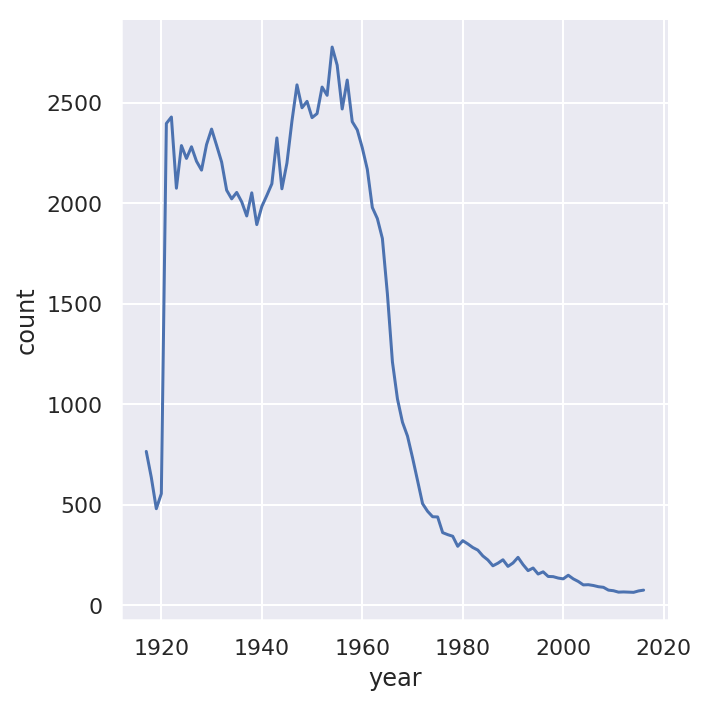

In [10]:
sns.relplot("year", "count", kind="line", data=femalemarys)

This can also be combined in a single statement, although it doesn't exactly help readability.

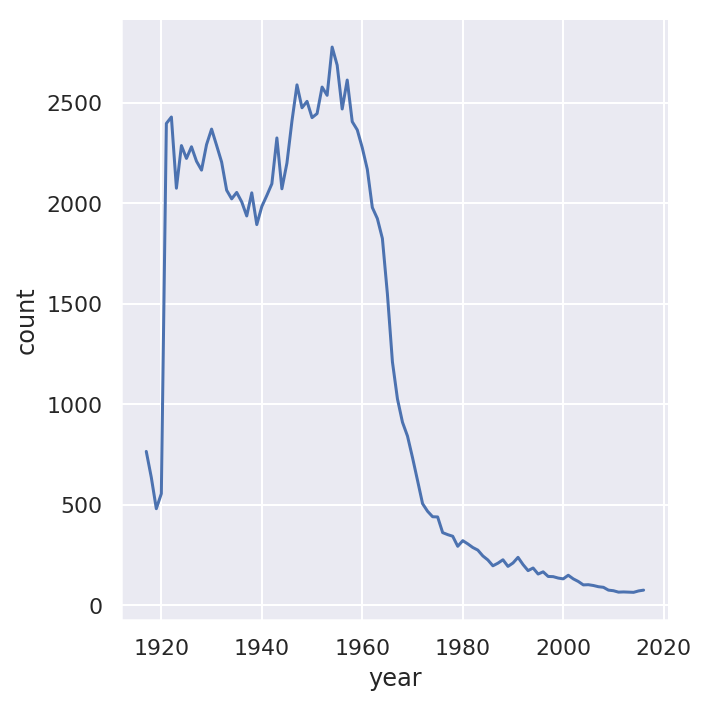

In [11]:
sns.relplot("year", "count", kind="line", data=babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")])

### Exercise 3.2
Plot your own name as a function of time. Fill in the `...` below. If your name is not in the data, you'll be happy to know that you are very unique. However, you'll also get a spectacular error. For the purpose of this exercise, just use any other name.  Run the cell with `imdone(3,2)` when you are done.

In [ ]:
yourname = ...
sns.relplot(..., kind="line", data=yourname)

In [ ]:
imdone(3,2)

In [ ]:
# Solution (HIDEME)
yourname = babynames[(babynames["name"] == "Emily") & (babynames["sex"] == "F")]
sns.relplot("year", "count", kind="line", data=yourname)

How to plot multiple data sets? Let's get the female babies name Marie too

In [12]:
femalemaries = babynames[(babynames["name"] == "Marie") & (babynames["sex"] == "F")]

Trying to plot both doesn't quite work

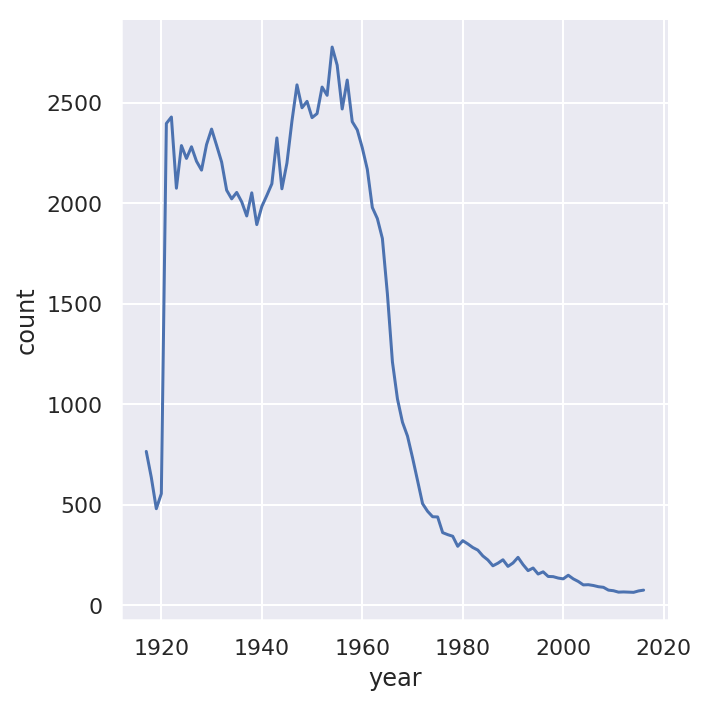

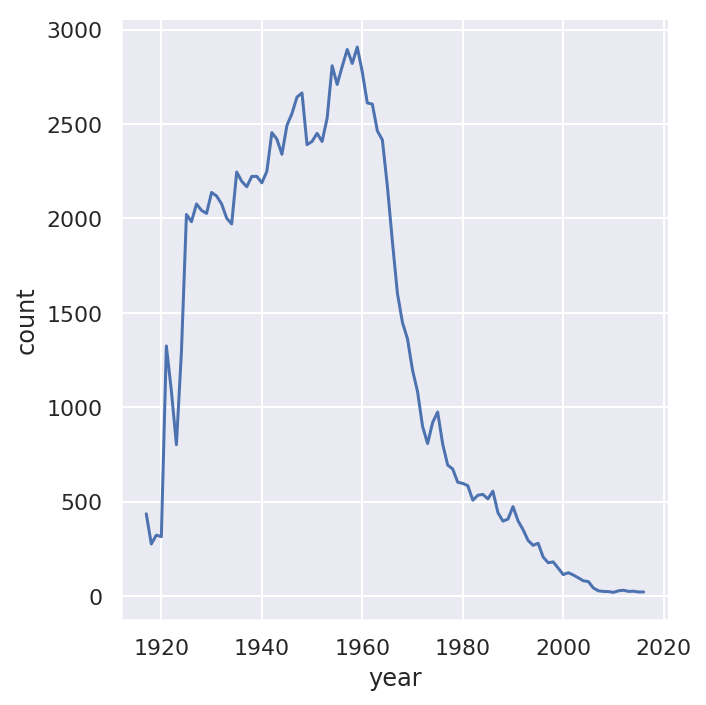

In [13]:
sns.relplot("year", "count", kind="line", data=femalemarys)
sns.relplot("year", "count", kind="line", data=femalemaries)

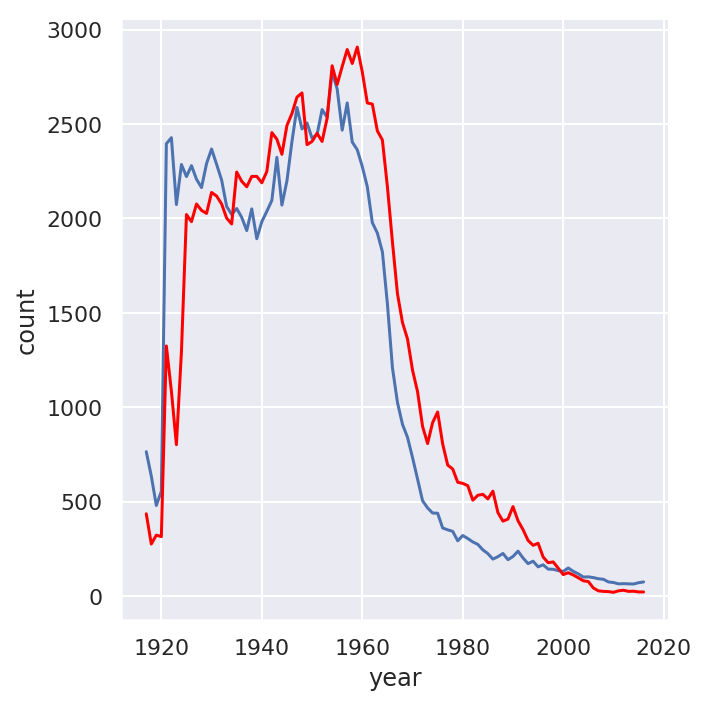

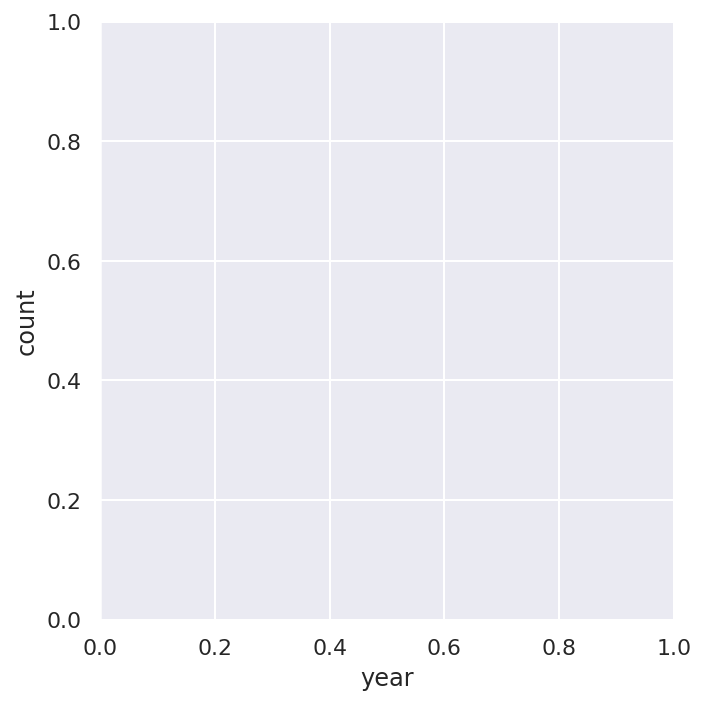

In [31]:
g = sns.relplot("year", "count", kind="line", data=femalemarys)
sns.relplot("year", "count", kind="line", data=femalemaries, ax=g.ax, color="red")

In [43]:
combined = femalemarys.join(femalemaries, on="year", lsuffix="mary", rsuffix="marie")
sns.relplot("year", ["marycount","mariecount"], data=combined)

ValueError: Could not interpret input 'year'

In [44]:
combined

,yearmary,sexmary,namemary,countmary,propmary,yearmarie,sexmarie,namemarie,countmarie,propmarie
290400,1917,F,Mary,765,0.012714,NaN,NaN,NaN,NaN,NaN
290401,1918,F,Mary,636,0.010570,NaN,NaN,NaN,NaN,NaN
290402,1919,F,Mary,480,0.007977,NaN,NaN,NaN,NaN,NaN
290403,1920,F,Mary,555,0.009224,NaN,NaN,NaN,NaN,NaN
290404,1921,F,Mary,2396,0.039819,NaN,NaN,NaN,NaN,NaN
290405,1922,F,Mary,2428,0.040351,NaN,NaN,NaN,NaN,NaN
290406,1923,F,Mary,2074,0.034468,NaN,NaN,NaN,NaN,NaN
290407,1924,F,Mary,2286,0.037991,NaN,NaN,NaN,NaN,NaN
290408,1925,F,Mary,2222,0.036927,NaN,NaN,NaN,NaN,NaN
290409,1926,F,Mary,2280,0.037891,NaN,NaN,NaN,NaN,NaN


In [45]:
femalemaries

,year,sex,name,count,prop
282700,1917,F,Marie,436,0.007246
282701,1918,F,Marie,276,0.004587
282702,1919,F,Marie,323,0.005368
282703,1920,F,Marie,315,0.005235
282704,1921,F,Marie,1325,0.022020
282705,1922,F,Marie,1086,0.018048
282706,1923,F,Marie,802,0.013328
282707,1924,F,Marie,1294,0.021505
282708,1925,F,Marie,2021,0.033587
282709,1926,F,Marie,1983,0.032956


In [50]:
combined=femalemarys.set_index("year").join(femalemaries.set_index("year"), lsuffix="mary", rsuffix="marie")

In [53]:
sns.relplot("year", "marycount", data=combined)

ValueError: Could not interpret input 'year'